# Pandas und SQL
Pandas besitzt mit DataFrames ein Konzept, das Tabellen in relationalen Datenbanken ähnelt. Entsprechend stehen auch ähnliche Operationen bereit, um diese miteinander zu verknüpfen.

In [ ]:
import pandas as pd
import sqlite3
import csv

from tui_dsg.datasets import disney_plus_titles_path
from tui_dsg.datasets import disney_plus_ratings_path

In [ ]:
# Datenbank im Arbeitsspeicher anlegen
db = sqlite3.connect(':memory:')

## Inhaltsverzeichnis
- [DataFrames als Tabelle speichern](#DataFrames-als-Tabelle-speichern)
- [DataFrames aus Tabellen lesen](#DataFrames-aus-Tabellen-lesen)
- [Operationen im DBMS](#Operationen-im-DBMS)
- [Hinweise zum Datensatz](#Hinweise-zum-Datensatz)

## DataFrames als Tabelle speichern
DataFrames können als Tabelle gespeichert werden. Zur Veranschaulichung müssen die Daten zunächst aus den Dateien geladen werden. Sie enthalten einen Auszug aus dem Datensatz [Disney+ Movies and TV Shows](https://www.kaggle.com/code/werador/disney-data-analysis/data) und die Bewertungen der TMDb Nutzer.

In [ ]:
df_titles = pd.read_csv(disney_plus_titles_path)
df_ratings = pd.read_csv(disney_plus_ratings_path)

Die Funktion `to_sql` benötigt den Namen der Ziel-Tabelle als String und eine Datenbankverbindung basierend auf SQLAlchemy oder SQLite3. Zusätzlich kann angegeben werden, welches Verhalten bei bereits existierenden Tabellen gewählt wird. Zurückgegeben wird die Anzahl der veränderten Zeilen.

In [ ]:
df_titles.to_sql('titles', db, if_exists='replace'), \
df_ratings.to_sql('ratings', db, if_exists='replace')

Nachdem die Daten in der Datenbank abgelegt wurden, können die DataFrames wieder gelöscht werden.

In [ ]:
del df_titles
del df_ratings

## DataFrames aus Tabellen lesen
Die Funktion `read_sql_table` liest eine Tabelle und speichert sie in ein DataFrame. Als Parameter werden der Name der Tabelle und eine Datenbankverbindung erwartet. Die Funktion benötigt allerdings zwangsweise SQLAlchemy.

Alternativ können mit der Methode `read_sql_query` SQL Statements auf einer beliebigen Datenbankverbindung ausgeführt und das Ergebnis in ein DataFrame gespeichert werden.

In [ ]:
df_titles = pd.read_sql_query('SELECT * FROM titles', db)
df_titles.head(3)

In [ ]:
df_ratings = pd.read_sql_query('SELECT * FROM ratings', db)
df_ratings.head(3)

Da Pandas automatisch den Index als Spalte in die Datenbank schreibt, sollte dieser wiederverwendet werden. Mit dem Parameter `index_col` können Sie eine der zurückgegebenen Spalten als Index verwenden.

In [ ]:
pd.read_sql_query('SELECT * FROM ratings', db, index_col='index').head(5)

## Operationen im DBMS
Diese Methode `read_sql_query` können Sie auch verwenden, um Operationen ins Datenbankmanagementsystem auszulagern.

Das erspart Ihnen bei Joins, beide Tabellen vollständig als DataFrames in den Arbeitsspeicher zu laden, und kann somit den Speicherverbrauch senken.

In [ ]:
df_merge = pd.read_sql_query('''
    SELECT *
    FROM      titles
    LEFT JOIN ratings
        ON show_id = show
''', db)
df_merge.head(5)

Bei Aggregationen kann möglicherweise die Menge der Daten, die über das Netzwerk gesendet werden muss, deutlich verringert werden.

In [ ]:
df_group_by_year = pd.read_sql_query('''
    SELECT release_year, AVG(duration)
    FROM titles
    GROUP BY release_year
''', db)
df_group_by_year.head(5)

## Hinweise zum Datensatz
Ein Teil der Ihnen zur Verfügung gestellten Daten wurden mit Hilfe der TMDb API erzeugt. Die Verwendung wird weder von TMDb unterstützt noch zertifiziert.

[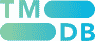](https://developers.themoviedb.org/3)